In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import  r2_score

In [3]:
df1= pd.read_csv('Position Salary .csv')
print (df1)

            Position  Level  Salary
0   Busienss Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4  120000
4    Country Manager      5  140000
5     Region Manager      6  130000
6            Partnor      7  100000
7     Senior Partnor      8   90000
8            C Level      9   95000
9               CEO      10   85000


In [4]:
x= df1.iloc[:,1:2].values
print (x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
y= df1.iloc[:,2].values
print (y)

[ 45000  50000  60000 120000 140000 130000 100000  90000  95000  85000]


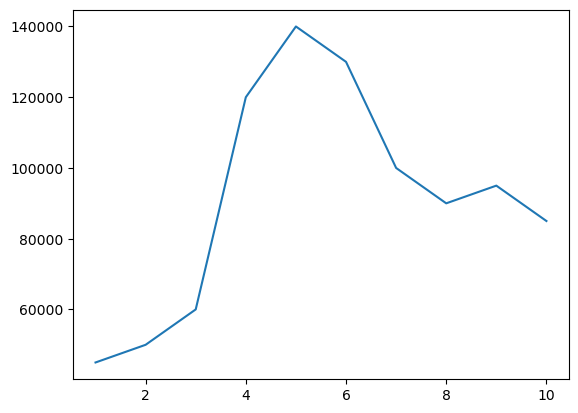

In [6]:
plt.plot(x,y)
plt.show()


In [7]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt= dt.fit (x,y)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit (x,y)

RandomForestRegressor()

In [9]:
y_pred = rf.predict(x)
print (y_pred)

[ 50400.  52100.  63300. 104700. 131900. 128200. 107800.  95000.  93400.
  88050.]


In [10]:
y

array([ 45000,  50000,  60000, 120000, 140000, 130000, 100000,  90000,
        95000,  85000])

In [11]:
accuracy = r2_score(y,y_pred)
print (accuracy)

0.9538873348873349


In [12]:
result =  pd.concat ([df1, pd.DataFrame(y_pred,columns = ['Prediction'])],axis = 1 )
result['Difference'] = result['Salary'] - result['Prediction']
print (result)

            Position  Level  Salary  Prediction  Difference
0   Busienss Analyst      1   45000     50400.0     -5400.0
1  Junior Consultant      2   50000     52100.0     -2100.0
2  Senior Consultant      3   60000     63300.0     -3300.0
3            Manager      4  120000    104700.0     15300.0
4    Country Manager      5  140000    131900.0      8100.0
5     Region Manager      6  130000    128200.0      1800.0
6            Partnor      7  100000    107800.0     -7800.0
7     Senior Partnor      8   90000     95000.0     -5000.0
8            C Level      9   95000     93400.0      1600.0
9               CEO      10   85000     88050.0     -3050.0


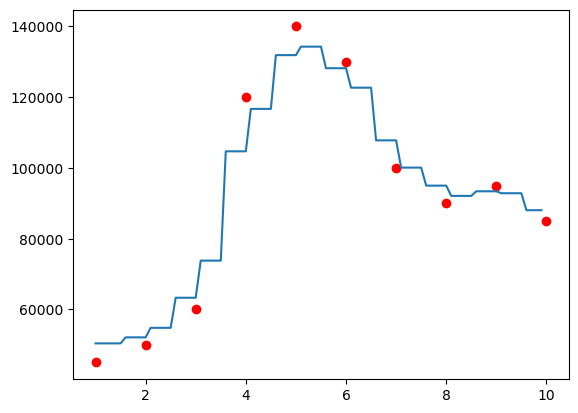

In [13]:
flat_x =x.ravel() 
x_grid = np.arange(min(flat_x ),max(flat_x ),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, rf.predict(x_grid))
plt.show()

In [14]:
rf.predict ([[3],[3.4], [3.8],[4.2]])

array([ 63300.,  73800., 104700., 116700.])

In [15]:
dt.predict([[3],[3.4], [3.8],[4.2]])

array([ 60000.,  60000., 120000., 120000.])